#Simulations of Physical Systems Assignment 1 
### Sho Hihara

## Part 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def euler(y_prime,x0,xf,y0,n):
    h = (xf-x0)/(n-1)
    x=np.linspace(x0,xf,n)
    y = np.zeros([n])
    y[0] = y0
    for i in range(1,n):
        y[i] = h*(y_prime(x[i-1],y[i-1])) + y[i-1]

    plt.plot(x,y,'o')
    plt.xlabel("x")
    plt.ylabel("y_approximated (Euler)")
    plt.title("Euler's approximations")
    plt.show()


def rk4(y_prime,x0,xf,y0,n):
    h = (xf-x0)/(n-1)
    x=np.linspace(x0,xf,n)
    y = np.zeros([n])
    y[0]=y0
    for i in range(1,n):
        k1 = h * y_prime(x[i-1], y[i-1])
        k2 = h * y_prime(x[i-1]+0.5*h, y[i-1]+0.5*k1)
        k3 = h * y_prime(x[i-1]+0.5*h, y[i-1]+0.5*k2)
        k4 = h * y_prime(x[i-1]+h, y[i-1]+k3)
        y[i] = y[i-1] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    plt.plot(x,y,'o')
    plt.xlabel("x")
    plt.ylabel("y_approximated (Runge-Kutta 4)")
    plt.title("RK4 approximations")
    plt.show()

def heun(y_prime,x0,xf,y0,n):
    h = (xf-x0)/(n-1)
    x=np.linspace(x0,xf,n)
    y = np.zeros([n])
    y[0]=y0
    for i in range(1,n):
        k = y[i-1] + h*y_prime(x[i-1], y[i-1])
        y[i] = y[i-1] + h*(y_prime(x[i-1], y[i-1]) + y_prime(x[i], k))
    
    plt.plot(x,y,'o')
    plt.xlabel("x")
    plt.ylabel("y_approximated (Heun)")
    plt.title("Heun approximations")
    plt.show()

def y_prime(x,y):
    return y-x**2



An example I found where different methods yield bizzarely different results


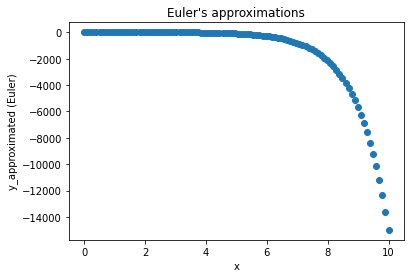

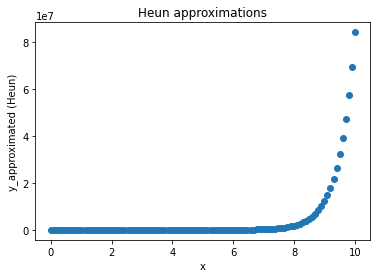

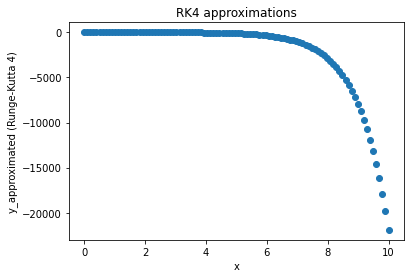

In [ ]:
t0=0
y0=1
tf=10
n=100

print("An example I found where different methods yield bizzarely different results")
euler(y_prime,t0,tf,y0,n)
heun(y_prime,t0,tf,y0,n)
rk4(y_prime,t0,tf,y0,n)

I would rather say less that certain methods are inherently superior to others, but the outcome is rather contextual where depending on the original equation, the timestep, the order of approximation (comparing RK4 to first order Euler is not really apples to apples), etc. Practically, there are also other concerns such as memory or computation time.

## Part 2

In [ ]:
def laplace_heat(max_iter, len_x, len_y, boundary, special_init="no"):

    # Set meshgrid
    X, Y = np.meshgrid(np.arange(0, len_x), np.arange(0, len_y))

    if special_init != "no" and isinstance(special_init, np.ndarray): 
        T = special_init
    
    else:
        # Initial guess of interior grid
        Tguess = 30

        # Set array size and set the interior value with Tguess
        T = np.empty((len_x, len_y))
        T.fill(Tguess) #honestly this guess isn't even necessary in most cases, just fill in with something

    Ttop,Tbottom,Tleft,Tright = boundary[0],boundary[1],boundary[2],boundary[3]

    # Set Boundary condition
    T[(len_y-1):, :] = Ttop
    T[:1, :] = Tbottom
    T[:, (len_x-1):] = Tright
    T[:, :1] = Tleft

    for iteration in range(0, max_iter):
        for i in range(1, len_x-1):
            for j in range(1, len_y-1):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    colorinterpolation = 100
    colourMap = plt.cm.jet
    plt.title("Contour of Temperature")
    plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.show()

Ver. Insulated walls:

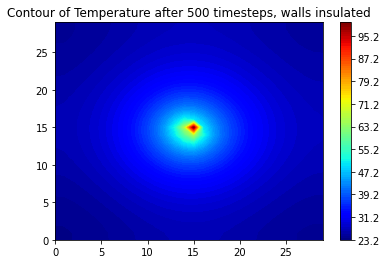

In [ ]:
maxIter = 500

# Set Dimension and delta
lenX = lenY = 30 #we set it rectangular

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Boundary condition
T_init_top = 0
T_init_bottom = 0
T_init_left = 0
T_init_right = 0
boundaries = [T_init_top, T_init_bottom, T_init_left, T_init_right]

heater_init = np.empty((lenX, lenY))
heater_init.fill(0) 
heater_init[int(len(heater_init)/2)][int(len(heater_init)/2)] = 100

T = heater_init


Ttop,Tbottom,Tleft,Tright = boundaries[0],boundaries[1],boundaries[2],boundaries[3]

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

for iteration in range(0, maxIter):

    for i in range(1, lenX-1): #inside all
        for j in range(1, lenY-1):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    for j in range(1, lenX-1): #top row
        T[lenY-1, j] = 1/3 * (T[lenY-1][j-1] + T[lenY-1][j+1] + T[lenY-2][j])
    for j in range(1, lenX-1): #bottom row
        T[0, j] = 1/3 * (T[0][j-1] + T[0][j+1] + T[1][j])
    for i in range(1, lenY-1): #right column
        T[i, lenX-1] = 1/3 * (T[i-1][lenX-1] + T[i+1][lenX-1] + T[i][lenX-2])
    for i in range(1, lenY-1): #left column
        T[i, 0] = 1/3 * (T[i-1][0] + T[i+1][0] + T[i][1])

    T[0,0] = 0.5 * (T[0][1] + T[1][0]) #bottomleft
    T[0,lenX-1] = 0.5 * (T[0][lenX-2] + T[1][lenX-1]) #bottomright
    T[lenY-1,0] = 0.5 * (T[lenY-1][1] + T[lenY-2][0]) #topleft
    T[lenY-1,lenX-1] = 0.5 * (T[lenY-1][lenX-2] + T[lenY-2][lenX-1]) #topright
    
    T[int(lenY/2)][int(lenX/2)] = 100 #stove always hot

colorinterpolation = 100
colourMap = plt.cm.jet
plt.title(f"Contour of Temperature after {iteration+1} timesteps, walls insulated")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

As long as the walls are insulated, the room becomes fairly warm after a while.

Ver. leaking corner window:

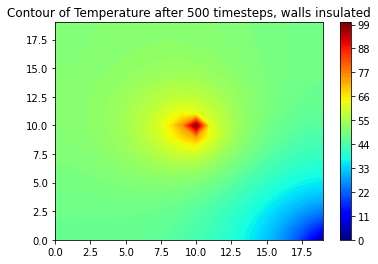

In [ ]:
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Boundary condition
T_init_top = 0
T_init_bottom = 0
T_init_left = 0
T_init_right = 0
boundaries = [T_init_top, T_init_bottom, T_init_left, T_init_right]

heater_init = np.empty((lenX, lenY))
heater_init.fill(0) #honestly this guess isn't even necessary in most cases, just fill in with something
heater_init[int(len(heater_init)/2)][int(len(heater_init)/2)] = 100

T = heater_init


Ttop,Tbottom,Tleft,Tright = boundaries[0],boundaries[1],boundaries[2],boundaries[3]

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

for iteration in range(0, maxIter):

    for i in range(1, lenX-1): #inside all
        for j in range(1, lenY-1):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    for j in range(1, lenX-1): #top row
        T[lenY-1, j] = 1/3 * (T[lenY-1][j-1] + T[lenY-1][j+1] + T[lenY-2][j])
    for j in range(1, lenX-1): #bottom row
        T[0, j] = 1/3 * (T[0][j-1] + T[0][j+1] + T[1][j])
    for i in range(1, lenY-1): #right column
        T[i, lenX-1] = 1/3 * (T[i-1][lenX-1] + T[i+1][lenX-1] + T[i][lenX-2])
    for i in range(1, lenY-1): #left column
        T[i, 0] = 1/3 * (T[i-1][0] + T[i+1][0] + T[i][1])

    T[0,0] = 0.5 * (T[0][1] + T[1][0]) #bottomleft
    T[0,lenX-1] = 0 #bottomright
    T[lenY-1,0] = 0.5 * (T[lenY-1][1] + T[lenY-2][0]) #topleft
    T[lenY-1,lenX-1] = 0.5 * (T[lenY-1][lenX-2] + T[lenY-2][lenX-1]) #topright
    
    T[int(lenY/2)][int(lenX/2)] = 100 #stove always hot

colorinterpolation = 100
colourMap = plt.cm.jet
plt.title(f"Contour of Temperature after {iteration+1} timesteps, walls insulated")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

The bottom right window area seems really cold.

Ver. 4 people maintaining roughly 25 degrees body temperature:

13 8
5 14
13 12
3 11


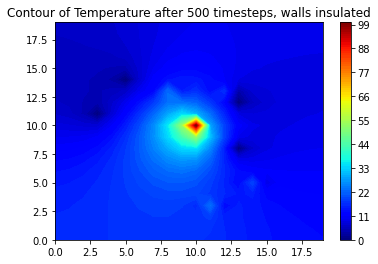

In [ ]:
maxIter = 500

# Set Dimension and delta
lenX = lenY = 20 #we set it rectangular

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Boundary condition
T_init_top = 0
T_init_bottom = 0
T_init_left = 0
T_init_right = 0
boundaries = [T_init_top, T_init_bottom, T_init_left, T_init_right]

heater_init = np.empty((lenX, lenY))
heater_init.fill(0) #honestly this guess isn't even necessary in most cases, just fill in with something
heater_init[int(len(heater_init)/2)][int(len(heater_init)/2)] = 100

T = heater_init


Ttop,Tbottom,Tleft,Tright = boundaries[0],boundaries[1],boundaries[2],boundaries[3]

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

xs = np.random.randint(2,lenX-2,4)
ys = np.random.randint(2,lenY-2,4)
for person in range(4):
    T[ys[person]][xs[person]] = 15
    print(ys[person],xs[person])

for iteration in range(0, maxIter):
    for i in range(1, lenX-1): #inside all
        for j in range(1, lenY-1):
            if [i,j] not in [[xs[p], ys[p]] for p in range(4)]:
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    for j in range(1, lenX-1): #top row
        T[lenY-1, j] = 1/3 * (T[lenY-1][j-1] + T[lenY-1][j+1] + T[lenY-2][j])
    for j in range(1, lenX-1): #bottom row
        T[0, j] = 1/3 * (T[0][j-1] + T[0][j+1] + T[1][j])
    for i in range(1, lenY-1): #right column
        T[i, lenX-1] = 1/3 * (T[i-1][lenX-1] + T[i+1][lenX-1] + T[i][lenX-2])
    for i in range(1, lenY-1): #left column
        T[i, 0] = 1/3 * (T[i-1][0] + T[i+1][0] + T[i][1])

    T[0,0] = 0.5 * (T[0][1] + T[1][0]) #bottomleft
    T[0,lenX-1] = 0.5 * (T[0][lenX-2] + T[1][lenX-1]) #bottomright
    T[lenY-1,0] = 0.5 * (T[lenY-1][1] + T[lenY-2][0]) #topleft
    T[lenY-1,lenX-1] = 0.5 * (T[lenY-1][lenX-2] + T[lenY-2][lenX-1]) #topright
    
    T[int(lenY/2)][int(lenX/2)] = 100 #stove always hot

    for person in range(4):
        if T[ys[person]][xs[person]] < 23:
            count = 0
            try:
                T[ys[person]][xs[person]+1] -= 3
                count += 1
            except:
                pass
            try:
                T[ys[person]][xs[person]-1] -= 3
                count += 1
            except:
                pass
            try:
                T[ts[person]+1][xs[person]] -= 3
                count += 1
            except:
                pass
            try:
                T[ts[person]-1][xs[person]] -= 3
                count += 1
            except:
                pass
            T[ys[person]][xs[person]] += count*3

        elif 27 < T[ys[person]][xs[person]]:
            count = 0
            try:
                T[ys[person]][xs[person]+1] += 3
                count += 1
            except:
                pass
            try:
                T[ys[person]][xs[person]-1] += 3
                count += 1
            except:
                pass
            try:
                T[ts[person]+1][xs[person]] += 1
                count += 1
            except:
                pass
            try:
                T[ts[person]-1][xs[person]] += 3
                count += 1
            except:
                pass
            T[ys[person]][xs[person]] -= count*3



colorinterpolation = 100
colourMap = plt.cm.jet
plt.title(f"Contour of Temperature after {iteration+1} timesteps, walls insulated")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()


Ver. Stove loses heat over time

T=101: Stove has no more heat


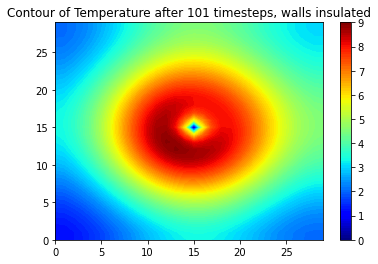

In [ ]:
maxIter = 500

# Set Dimension and delta
lenX = lenY = 30 #we set it rectangular

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Boundary condition
T_init_top = 0
T_init_bottom = 0
T_init_left = 0
T_init_right = 0
boundaries = [T_init_top, T_init_bottom, T_init_left, T_init_right]

heater_init = np.empty((lenX, lenY))
heater_init.fill(0) #honestly this guess isn't even necessary in most cases, just fill in with something
heater_init[int(len(heater_init)/2)][int(len(heater_init)/2)] = 100

T = heater_init


Ttop,Tbottom,Tleft,Tright = boundaries[0],boundaries[1],boundaries[2],boundaries[3]

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

for iteration in range(0, maxIter):

    for i in range(1, lenX-1): #inside all
        for j in range(1, lenY-1):
            if [i,j] != [int(lenY/2), int(lenX/2)]:
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    for j in range(1, lenX-1): #top row
        T[lenY-1, j] = 1/3 * (T[lenY-1][j-1] + T[lenY-1][j+1] + T[lenY-2][j])
    for j in range(1, lenX-1): #bottom row
        T[0, j] = 1/3 * (T[0][j-1] + T[0][j+1] + T[1][j])
    for i in range(1, lenY-1): #right column
        T[i, lenX-1] = 1/3 * (T[i-1][lenX-1] + T[i+1][lenX-1] + T[i][lenX-2])
    for i in range(1, lenY-1): #left column
        T[i, 0] = 1/3 * (T[i-1][0] + T[i+1][0] + T[i][1])

    T[0,0] = 0.5 * (T[0][1] + T[1][0]) #bottomleft
    T[0,lenX-1] = 0.5 * (T[0][lenX-2] + T[1][lenX-1]) #bottomright
    T[lenY-1,0] = 0.5 * (T[lenY-1][1] + T[lenY-2][0]) #topleft
    T[lenY-1,lenX-1] = 0.5 * (T[lenY-1][lenX-2] + T[lenY-2][lenX-1]) #topright
    
    if T[int(lenY/2)][int(lenX/2)] > 0:
        T[int(lenY/2)][int(lenX/2)] -= 1 #stove temp decrease by 1
    else:
        print(f"T={iteration+1}: Stove has no more heat")
        break

colorinterpolation = 100
colourMap = plt.cm.jet
plt.title(f"Contour of Temperature after {iteration+1} timesteps, walls insulated")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

## Part 3

Lagrangian: 
$L=KE-PE$

$PE_{spr} = \frac{1}{2}kx^2 $

$PE_{g} = -mgr\cdot \cos\theta$

$KE = \frac{1}{2}mv^2$

$KE = \frac{1}{2}m(\dot x^2 + r^2  \dot \theta^2)$

$L = KE - PE_{spr} - PE_{g}$

$L[x,\dot x, \theta, \dot \theta] = \frac{1}{2}m(\dot x^2 + r^2 \dot \theta^2) - \frac{1}{2}kx^2+gmr\cos\theta$ 

$\frac{\partial L}{\partial x} - \frac{d}{dt} \frac{\partial L}{\partial \dot x} = 0$

$\frac{\partial L}{\partial \theta} - \frac{d}{dt} \frac{\partial L}{\partial \dot \theta} = 0$

$mr\dot \theta^2 - kx + gm\cos\theta - m\ddot x = 0$

$\ddot x = r\dot \theta^2 - \frac{k}{m}x + g\cos\theta \ \ \ \ \ \ \ \ \ \ $  － (1)

$-gmr\sin\theta - mr^2\ddot \theta -2mr\dot x \dot \theta = 0$

$\ddot \theta = -\frac{g\sin\theta+2\dot x \dot\theta}{r} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $  － (2)

I used the same fourth order Runge Kugga (but better formatted for compatibility with the elastic pendulum system) method to numerically approximate the equations (1) and (2) .


In [ ]:
def rk4_ver2(func, u, s, tmax, dt):

    m, g, l_0, k = s
    t = np.arange(0, tmax+0.5*dt, dt)
    U = [u]

    for i in range(1,len(t)):
        k1 = func(u,m,g,l_0,k)*dt
        k2 = func(u+0.5*k1,m,g,l_0,k)*dt
        k3 = func(u+0.5*k2,m,g,l_0,k)*dt
        k4 = func(u+k3,m,g,l_0,k)*dt
        u = u + (k1+2*k2+2*k3+k4)/6
        U.append(u)

    th, r, v_th, v_r = np.asarray(U).T
    plt.subplot(2,1,1);plt.plot(t,r);
    plt.subplot(2,1,2);plt.plot(t,th);
    plt.show()

    plt.polar(th,r);
    axes = plt.gca()
    axes.set_xlim([min(th),max(th)])
    axes.set_ylim([0.99*min(r),1.01*max(r)])
    axes.set_theta_zero_location("S")
    plt.show()
    

def elastic_pendulum(u,m,g,l_0,k):
    th, r, v_th, v_r = u
    a_th = (-g*np.sin(th) - 2*v_th*v_r) / r #d^2(th)/dt^2
    a_r  = r*v_th**2 - k/m*(r-l_0) + g*np.cos(th) #d^2r/dt^2
    return np.array([ v_th, v_r, a_th, a_r])



In [ ]:
g  = 9.81          #gravity
m  = 1             #mass
k  = 40            #spring constant

th_0 = np.pi/3  #initial theta
l_0 = 10             #spring at rest
v_th_0    = 0         #initial theta velocity
v_r_0    = 0         #initial l velocity
u = np.array([ th_0, l_0, v_th_0, v_r_0])

tmax= 20
dt = 0.1           #timestep

s = np.array([m,g,l_0,k])

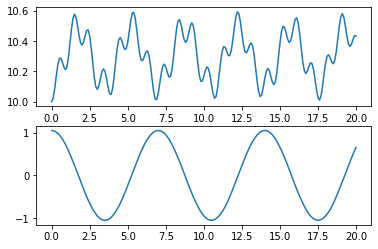

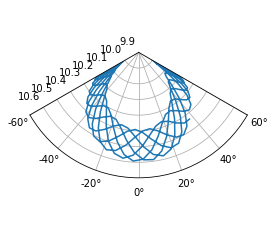

In [ ]:
rk4_ver2(elastic_pendulum, u, s, tmax, dt)

We get a chaotic behavior. Notice how theta actually remains perfectly periodic while the r does not (because the theta affects what portion of the gravitational acceleration affects the mass in the direction of the spring, which then affects the r.)

One idea to test if a simulation is working is to look out for any physically impossible outputs. For example, a spring pendulum's theta (absolute) cannot be larger than where it started, assuming that the initial spring is in rest. If at any point such an output is observed from the simulation, we can say it requires debbugging. 